In [4]:
# This notebook is adapted from the OpenAI cookbook. 
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video
import base64
import time
import os
import requests

In [17]:
video = cv2.VideoCapture("NBA Game 0021800013.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

639 frames read.


In [18]:
import base64
import os
import re

def base64_encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

def extract_frame_number(filename):
    match = re.search(r'frame_(\d+)', filename)
    return int(match.group(1)) if match else -1

directory = "team_labelled_output_frames/"

# Create a list of tuples (frame_number, image_path)
frame_paths = []
for filename in os.listdir(directory):
    if filename.lower().endswith('.jpg'):
        frame_number = extract_frame_number(filename)
        if frame_number != -1:
            image_path = os.path.join(directory, filename)
            frame_paths.append((frame_number, image_path))

# Sort the list based on frame number
frame_paths.sort(key=lambda x: x[0])

# Encode images in the sorted order
annoted_frames = []
for _, image_path in frame_paths:
    print(image_path)
    annoted_frames.append(base64_encode_image(image_path))

team_labelled_output_frames/frame_0.jpg
team_labelled_output_frames/frame_1.jpg
team_labelled_output_frames/frame_2.jpg
team_labelled_output_frames/frame_3.jpg
team_labelled_output_frames/frame_4.jpg
team_labelled_output_frames/frame_5.jpg
team_labelled_output_frames/frame_6.jpg
team_labelled_output_frames/frame_7.jpg
team_labelled_output_frames/frame_8.jpg
team_labelled_output_frames/frame_9.jpg
team_labelled_output_frames/frame_10.jpg
team_labelled_output_frames/frame_11.jpg
team_labelled_output_frames/frame_12.jpg
team_labelled_output_frames/frame_13.jpg
team_labelled_output_frames/frame_14.jpg
team_labelled_output_frames/frame_15.jpg
team_labelled_output_frames/frame_16.jpg
team_labelled_output_frames/frame_17.jpg
team_labelled_output_frames/frame_18.jpg
team_labelled_output_frames/frame_19.jpg
team_labelled_output_frames/frame_20.jpg
team_labelled_output_frames/frame_21.jpg
team_labelled_output_frames/frame_22.jpg
team_labelled_output_frames/frame_23.jpg
team_labelled_output_frame

In [19]:
base64Frames = annoted_frames

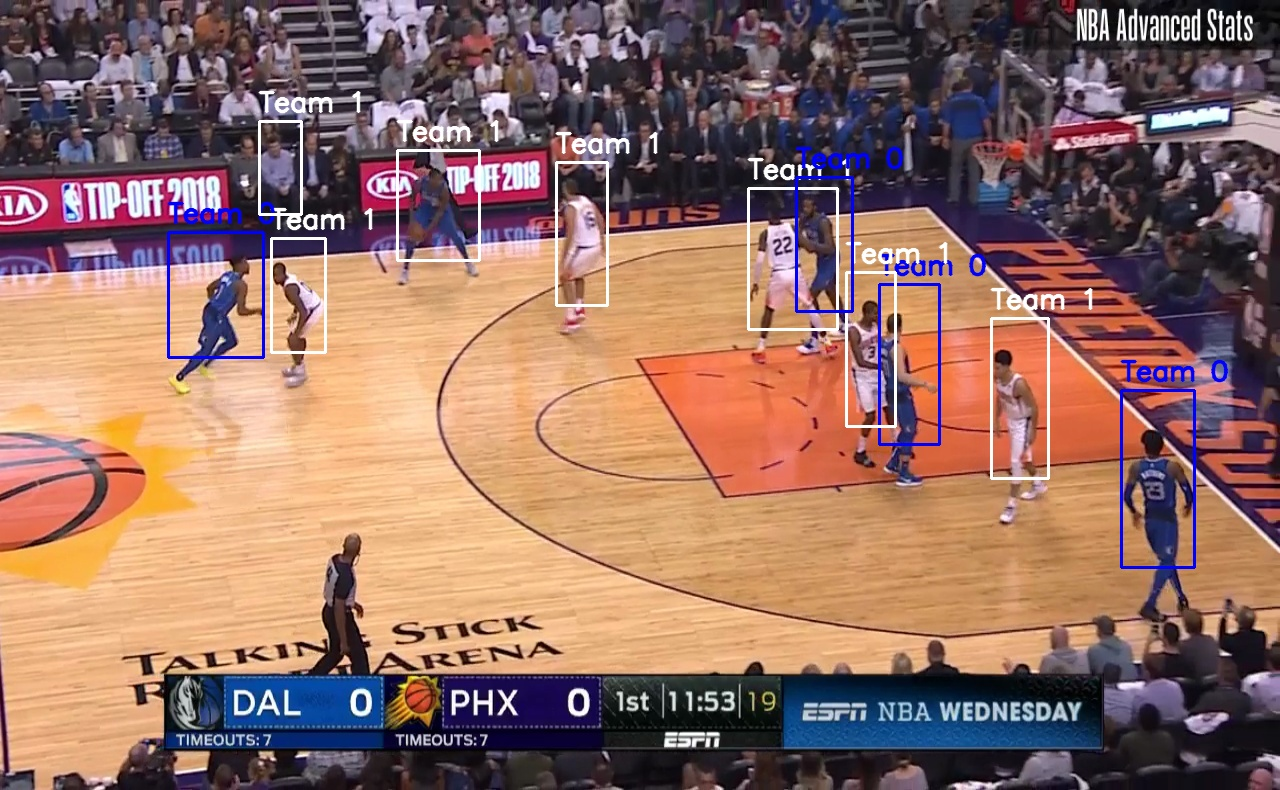

Total frames displayed: 59


In [20]:
# Initialize the display handle
display_handle = display(None, display_id=True)
frames = 0
imp_frames = []
for i in range(0, len(base64Frames), 11):  # Step size is 16 (1 frame + skip 15)
    # Decode and display the current frame
    img = base64Frames[i]
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.25)  # Adjust sleep time as needed for better visibility
    frames += 1
    imp_frames.append(img)
print("Total frames displayed:", frames)

In [21]:
base64Frames = imp_frames

In [23]:
from openai import OpenAI

client = OpenAI()

# Number of frames to process in each batch
batch_size = 5
total_frames = len(base64Frames)

# To store all generated commentaries
commentaries = []

for i in range(0, total_frames, batch_size):
    # Get the current batch of frames
    batch_frames = base64Frames[i:i + batch_size]

    # Construct messages for the current batch
    messages = [
        {
            "role": "user",
            "content": [
               {
    "type": "text",
    "text": """Analyze these sequential frames from a basketball game. For each frame:
    1. Describe the critical basketball action (e.g., shot attempt, pass, dribble, defense).
    2. Note key player movements or positioning.
    3. Highlight any significant game dynamics or strategy.
    Provide a summarised crisp, concise description (2-3 sentences max) of gamelplay over all the frames. Finally end the description with __END__."""
        },  # Add the image URLs to the content
                *map(lambda img: {"type": "image_url", "image_url": {
                    "url": f"data:image/jpeg;base64,{img}"}, }, batch_frames),
            ],
        }
    ]

    # Call the API with the constructed messages
    response = client.chat.completions.create(
        model="gpt-4-turbo",
        messages=messages,
        max_tokens=500,
    )

    # Append the generated commentary to the list
    commentaries.append(response.choices[0].message.content)

# Combine all commentaries into a single output
final_commentary = " ".join(commentaries)

# Print the entire commentary
print(final_commentary)

In these sequential frames from a basketball game, the gameplay revolves around a series of events centered on Team 1's offense and Team 0's defense. 

1. Team 1 is executing an offensive play, with the player in possession of the basketball making a move toward Team 0's basket while being defended by a player from Team 0. The rest of Team 1's players are positioned around the three-point line and near the basket.

2. As the play develops, there is considerable spacing between players that suggests Team 1 is utilizing the entire court to spread out Team 0's defense. This action creates potential driving lanes and shooting opportunities for Team 1.

3. Across the frames, Team 0 maintains a defensive stance, focusing on man-to-man coverage. The positioning near the basket appears tight, suggesting a defensive strategy to prevent easy baskets in the paint.

Overall, these frames depict a critical offensive maneuver by Team 1 against a strategically positioned defense by Team 0. Team 1's u

In [5]:
final_commentary = """
Welcome to the Talking Stick Resort Arena, where an electrifying showdown unfolds as the Dallas Mavericks clash with the Phoenix Suns! The air crackles with anticipation, setting the stage for a riveting battle of wits and agility.

Key Highlights:

- Right from the start, the game ignites with a fiercely contested tip-off! Both teams leap into action, each vying to seize control. The Mavericks expertly spread the defense, crafting lanes for spectacular shots and daring drives!
- Watch as the Mavericks' Player 3 makes a standout play! With defenders closing in, he nails a critical jump shot right under the basket, a testament to their sharp offensive strategy and sheer determination!
- Not to be outdone, the Suns mount a formidable defense. They stick close, man-to-man, thwarting the Mavericks at every turn. Offensively, they're a blur across the court, exploiting fast breaks to keep the pressure dialed up!

Conclusion:

As the final whistle blows, both the Dallas Mavericks and the Phoenix Suns have left nothing on the court. The Mavericks dazzled with their strategic use of space and audacious plays, while the Suns countered with vigorous defense and rapid-fire counterattacks. What a game, folks! A true spectacle of speed, strategy, and sportsmanship."
"""

In [ ]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {OPENAI_API_KEY}",
    },
    json={
        "model": "tts-1",
        "input": final_commentary,
        "voice": "onyx",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)

In [8]:
with open('output.mp3', 'wb') as file:
    file.write(audio)
    
print("The MP3 file has been saved locally as 'output.mp3'.")

The MP3 file has been saved locally as 'output.mp3'.


In [ ]:
from pydub import AudioSegment
import os

def speed_swifter(sound, speed=1.0):
    return sound_with_altered_frame_rate = sound._spawn(sound.raw_data, overrides={"frame_rate": int(sound.frame_rate * speed)})

in_path = 'your/path/of/input_file/hello.mp3'
ex_path = 'your/path/of/output_file/hello.mp3'
sound = AudioSegment.from_file(in_path)    

# generate a slower audio for example
slower_sound = speed_change(sound, 0.5)

slower_sound.export(os.path.join(ex_path, 'slower.mp3'), format="mp3")